# <center>Laboratorium 2<br>Metody Numeryczne</center>

Biblioteki niezbędne do wykonania zadania:

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from typing import List

***Zadanie 1.***  
Zdefiniuj w notatniku funkcję $f(x)= x^{3} - 3x$ i sporządź jej wykres dla argumentów z przedziału:  
1. $x\in<-1,1>$  
2. $x\in<-5,5>$  
3. $x\in<0,5>$
  
***Wskazówki***
Jako argumentu funkcji można użyć numpy array.  

Do wizualizacji wyników w Pythonie używa się pakietu [Matplotlib](https://matplotlib.org/). Działanie tego pakietu prezentuje przykład:

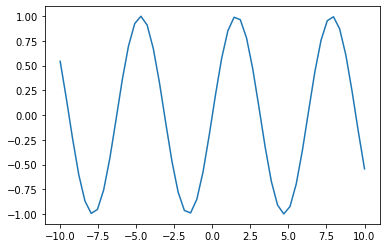

In [6]:
x = np.linspace(-10,10)
# inicjalizacja wektora f(x) = sin(x)
y = np.sin(x)
plt.plot(x, y, label ='sin(x)')
plt.show()

Wspierając się dokumentacją [Matplotlib](https://matplotlib.org/) dodaj do wykresu etykiety osi, tytuł, grida i legendę.

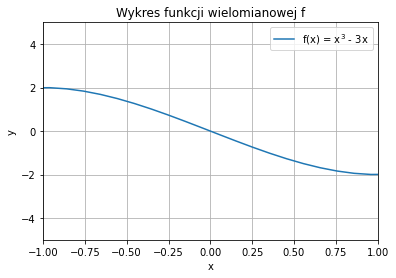

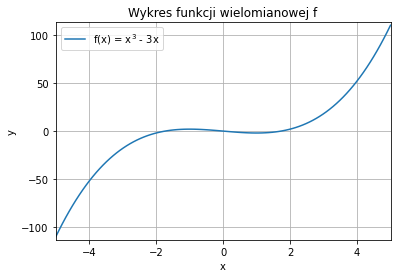

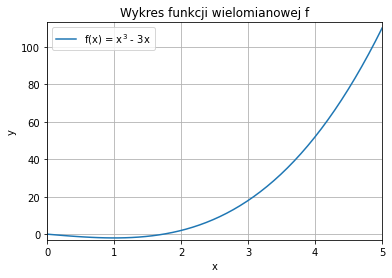

In [17]:
def wielomian(arg: np.array) -> np.array:
    return arg**3 - 3*arg #funkcja tworząca array w/g wzoru zadanej funkcji f, bez konieczności ręcznego wprowadzania argumentów
# za każdym razem, kiedy zestaw danych się zmienia, brak generowania niepotrzebnych zmiennych

def do_plot(lims: List[int],arg: np.array, var: np.array): #w celu zmniejszenia liczby linijek kodu zarówno w tym jak i następnym zadaniu
    plt.plot(arg, var, label = 'f(x) = $\mathregular{x^3}$ - 3x') # '$\mathregular{...}$' sposób na poprawne matematycznie wyświetlanie tekstu
    minim = wielomian(lims[0]) # w przypadku tej funkcji można próbować zautomatyzować dopasowywanie przedziałów na osiach, bo 
    maxim = wielomian(lims[1]) #funkcja jest rosnąca prawie w całej dziedzinie, dla innych trzeba by szukać również w wartościach
    if minim <= maxim: #środkowych i to je wykorzystywać do korekty, ewentualnie spróbować wprowadzić obliczenia na przedziale 
        plt.ylim([minim - 3, maxim + 3]) #zajmowanym przez wartości krańcowe
        plt.xlim(lims)
    else:
        plt.axis([lims[0], lims[1], maxim - 3, minim + 3])
    plt.legend() #domyślny sposób wstawiania legendy, chociaż pozycję można wprowadzić ręcznie
    plt.title('Wykres funkcji wielomianowej f')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid() #grid domyślny
    plt.show() #wyrysowanie wykresu na ekranie
    
x = np.linspace(-5,5,100)
y = wielomian(x)
do_plot([-1, 1], x, y) #limity zawsze w nawiasach kwadratowych
do_plot([-5, 5], x, y)
do_plot([0, 5], x, y)

***Zadanie 2.***  
Dla funkcji z zadania pierwszego używając wektora $x \in <-10,10>$ wyrysuj wykres dla argumentów:
1. $x\in<-1,1>$  
2. $x\in<-10,-1>$  
3. $x\in<1,10>$

Używając do tego funkcji: [ylim](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.ylim.html), [xlim](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.xlim.html), [axis](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.axis.html)

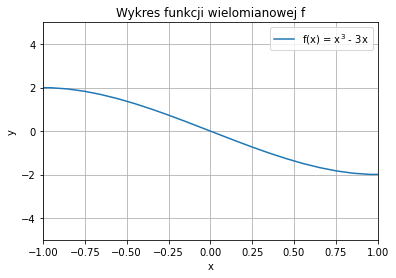

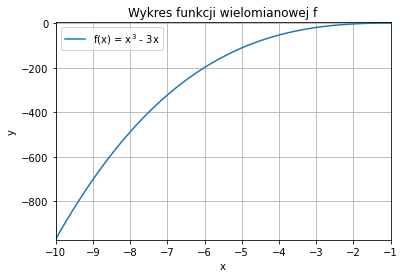

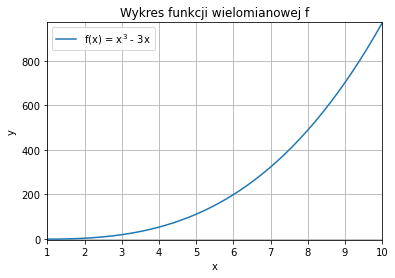

In [16]:
x = np.linspace(-10,10,200)
y = wielomian(x)
do_plot([-1, 1], x, y)
do_plot([-10, -1], x, y)
do_plot([1, 10], x, y)
#funkcja do_plot posiada zaimplementowane metody ylim, xlim, axis
#dzięki przykładom z przedziałami gdzie funkcja maleje i rośnie wykorzystane zostały wszystkie wymagane funkcje

***Zadanie 3.*** 
Oblicz ilość ciepła, które wydzieli się podczas hamowania jeżeli opisuje je zależność:  
  
$Q = \cfrac{mv^2}{2}$  
  
jeżeli $m = 2500g$, $v = 60km/h$, wypisz wynik oraz podaj w kilokaloriach i dżulach. Wykreśl wykresy które zobrazują zmianę ilości ciepła w procesie hamowania dla ciała o masie $3000g$ i prędkości $v\in<200,0>km/h$, przedstawiając ciepło hamowania na pierwszym w skali liniowej na drugim w skali logarytmicznej.  

***Wsakzówka:*** Do stworzenia wykresów z osią logarytmiczną skorzystaj z funkcji: [semilogy](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogy.html), [xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html?highlight=xlim#matplotlib.pyplot.xlim) i [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure) z pakietu *Matplotlib*. 

Ciepło wytworzone przy hamowaniu ciała o masie 2500 g i prędkości 60 km/h = 347.22 J = 0.08 kcal


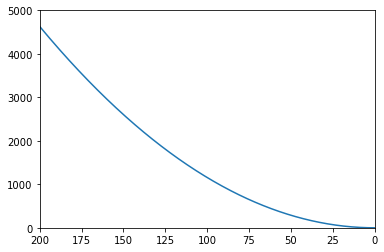

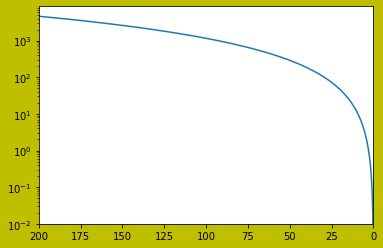

In [23]:
m1 = 2500
v1 = 60
heat1 = m1 / 1000 * (v1 * 1000 / 3600)**2 / 2 #zawarte przeliczenia jednostek g -> kg oraz km/h -> m/s
print('Ciepło wytworzone przy hamowaniu ciała o masie {0} g i prędkości {1} km/h = {2} J = {3} kcal'.format(m1, v1, round(heat1, 2), round(heat1/4184, 2)))
v2 = np.linspace(200,0,500) #powyżej przeliczenie na kilokalorie zawarte już w linijce z printem, w celu zaoszczędzenia miejsca
m2 = 3000
q = np.multiply(v2,v2)*m2/2*1000/3600/3600
plt.plot(v2,q)
plt.xlim([200, 0]) #odwrócenie wartości na osi x, żeby hamowanie było bardziej uwidocznione
plt.ylim([0, 5000])
plt.show()
plt.figure(facecolor = 'y',edgecolor = 'y') #eksperymenty na obiekcie Figure
plt.semilogy(v2,q)
plt.xlim([200, 0]) #limit może zawierać 0, bo to oś pionowa jest logarytmiczna, gdyby x był logarytmizowany, to 0 wypada z dziedziny
plt.show()

***Zadanie 4.***  
Częstą praktyką szczególnie w dziedzinie analizy danych, statystyce, uczeniu maszynowym, itp. jest tworzenie na podstawie biblioteki [Matplotlib](https://matplotlib.org/) własnych szablonów wykresów stworzonych na podstawie funkcji. Najprostszy przykład to przeładowanie funkcji plot tak by wykres miał czerwony kolor:

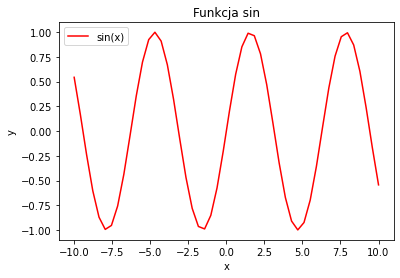

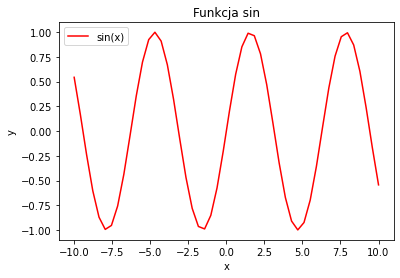

In [33]:
def my_plot(x,y,xlabel,ylabel,title,label):
    if x.shape != y.shape or  min(x.shape)==0:
        return None
    fig, ax = plt.subplots()
    ax.plot(x, y, 'r', label=label)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.legend()
    return fig

x = np.linspace(-10,10)
# inicjalizacja wektora f(x) = sin(x)
y = np.sin(x)
my_plot(x,y,'x','y','Funkcja sin', 'sin(x)')

Zaimplementuj funkcję *compare\_plot* w taki sposób by na jednym wykresie wyrysowane były dwie funkcje typu [plot](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). Pierwsza ma rysować się w kolorze niebieski i grubość lini ma wynosić 4, druga natomiast w kolorze czerwonym o grubości lini 2. Domyślnie ma być dodawana legenda. Dodatkowo użytkownik ma mieć możliwość ustawienia parametrów:
- x1 - wektor wartości osi x dla pierwszego wykresu,
- y1 - wektor wartości osi y dla pierwszego wykresu,
- x2 - wektor wartości osi x dla drugiego wykresu,
- y2 - wektor wartości osi x dla drugiego wykresu,
- xlabel - opis osi x,
- ylabel - opis osi y,
- title - tytuł wykresu ,
- label1 - nazwa serii z pierwszego wykresu,
- label2 - nazwa serii z drugiego wykresu.

Jeżeli nie da się wyrysować danych należy zwrócić wartość None.

Figure(432x288)


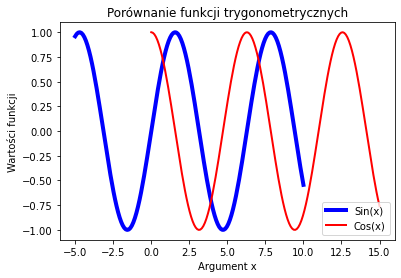

In [16]:
a1 = np.linspace(-5,10,150)
a2 = np.linspace(0,15,150) #array stworzone specjalnie na różnych przedziałach, aby przekonać się, czy wyświetlą się zgodnie z 
b1 = np.sin(a1) # nimi, czy może też jeden przesunie się do drugiego. Jak widać komenda wykonana poprawnie.
b2 = np.cos(a2)
xlabel = 'Argument x'
ylabel = 'Wartości funkcji'
title = 'Porównanie funkcji trygonometrycznych'
label1 = 'Sin(x)'
label2 = 'Cos(x)'
# main.compare_plot(a1,b1,a2,b2,xlabel,ylabel,title,label1,label2) - kiedy wykonamy to polecenie, wykres wyświetli się dwukrotnie
print(main.compare_plot(a1,b1,a2,b2,xlabel,ylabel,title,label1,label2)) # kiedy wykonamy to polecenie, wykres wyświetli się
# tylko jeden raz, ale dodatkowo nad nim pojawi się rozmiar figury, która jest zwracana

** Zadanie 5 **  
Za pomocą funkcji *compare\_plot* rozwiąż graficznie równanie: $f(x) = g(x)$, gdzie:  
$f(x) = x+2$  
$g(x) = x^2 -2sin(x) + 3$

0.018836684617300925 0.03914720608301003


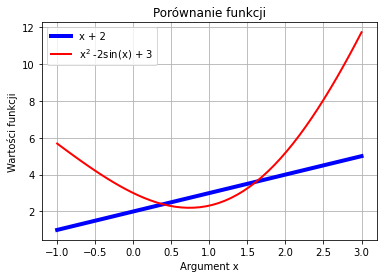

In [6]:
c1 = np.linspace(-1,3,50)
d1 = c1 + 2
d2 = np.multiply(c1,c1) - 2 * np.sin(c1) + 3
xlabel = 'Argument x'
ylabel = 'Wartości funkcji'
title = 'Porównanie funkcji'
label1 = 'x + 2'
label2 = '$\mathregular{x^2}$ -2sin(x) + 3'
fig = main.compare_plot(c1,d1,c1,d2,xlabel,ylabel,title,label1,label2)
plt.grid()
x_01 = 0.4 #odczytane z wykresu
x_02 = 1.6 #odczytane z wykresu
odch1 = x_01 + 2 - x_01 * x_01 + 2 * np.sin(x_01) - 3 #sprawdzenie jak różni się odczyt z wykresu od stanu faktycznego
odch2 = x_02 + 2 - x_02 * x_02 + 2 * np.sin(x_02) - 3 #sprawdzenie jak różni się odczyt z wykresu od stanu faktycznego
print(odch1,odch2) #wypisanie odchyleń - odchylenia na poziomie części setnych jedności = dobre szacowanie w tym przypadku, 
# ponieważ nie można wyłącznie na podstawie metody graficznej wysnuwać jakichkolwiek wniosków o charakterze liczbowym

***Zadanie 6.***   
Innym przydatnym sposobem prezentowania wykresów jest [subplot](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplot.html), czyli wyrysowanie obok siebie kilku wykresów. Zaimplementuj funkcję parallel_plot tak by obok siebie wyrysowane zostały dwa standardowe ploty i użytkownik mógł podać parametry:
- x1 - wektor wartości osi x dla pierwszego wykresu,
- y1 - wektor wartości osi y dla pierwszego wykresu,
- x2 - wektor wartości osi x dla drugiego wykresu,
- y2 - wektor wartości osi x dla drugiego wykresu,
- x1label - opis osi x dla pierwszego wykresu,
- y1label - opis osi y dla pierwszego wykresu,
- x2label - opis osi x dla drugiego wykresu,
- y2label - opis osi y dla drugiego wykresu,
- title - tytuł wykresu,
- orientation - parametr przyjmujący wartość '-' jeżeli subplot ma posiadać dwa wiersze albo '|' jeżeli ma posiadać dwie kolumny.

Jeżeli nie da się wyrysować danych należy zwrócić wartość None.

 

Figure(936x360)
Figure(504x720)


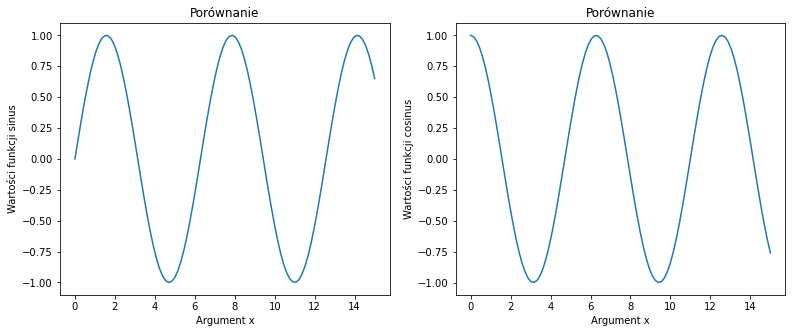

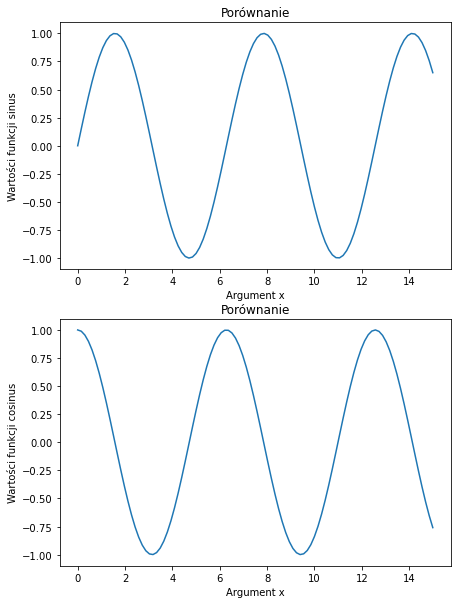

In [21]:
a1 = np.linspace(0,15,100) #jednakowe przedziały i krok, aby móc porównać funkcje
a2 = np.linspace(0,15,100)
b1 = np.sin(a1)
b2 = np.cos(a2)
x1label = 'Argument x'
y1label = 'Wartości funkcji sinus'
x2label = 'Argument x'
y2label = 'Wartości funkcji cosinus'
title = 'Porównanie'
orientation1 = '|'
orientation2 = '-'
print(main.parallel_plot(a1,b1,a2,b2,x1label,y1label,x2label,y2label,title,orientation1)) # dwa w jednym rzędzie
print(main.parallel_plot(a1,b1,a2,b2,x1label,y1label,x2label,y2label,title,orientation2)) # dwa w jednej kolumnie
# w funkcji parallel_plot nastawione zostały specjalnie rozmiary figur tworzonych przy plotowaniu w zależności od 
# 'orientation', ponieważ bez tej modyfikacji, wykresy były za bardzo do siebie zbliżone, co powodowało przesłanianie
# nazw wykresów, nazw osi, wartości na osiach itp.

***Zadanie 7.***  
Za pomocą funkcji *parallel\_plot*  i przedstaw na jednym z nich [Spirale logarytmiczną](https://pl.wikipedia.org/wiki/Spirala_logarytmiczna) w szerokim przedziale, a w drugim w okolicy zera.

Figure(936x360)


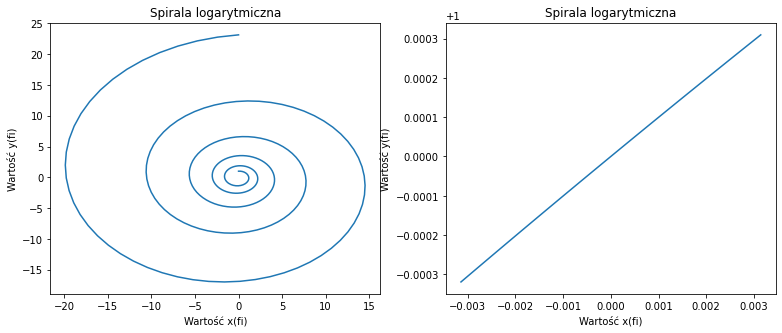

In [3]:
fi = np.linspace(0, 10 * np.pi, 300) #przedział szeroki dla kąta
fi_male = np.linspace(-0.001 * np.pi, 0.001 * np.pi, 50) #przedział w okolicy zera dla kąta

R1 = np.exp(0.1 * fi) #określenie zmiennego promienia dla szerszego przedziału z parametrami a=1 i b=0.1
x1 = R1 * np.sin(fi) #reprezentacja parametryczna krzywej
y1 = R1 * np.cos(fi)
R2 = np.exp(0.1 * fi_male) #określenie zmiennego promienia dla węższego przedziału z parametrami a=1 i b=0.1
x2 = R2 * np.sin(fi_male)
y2 = R2 * np.cos(fi_male)
print(main.parallel_plot(x1,y1,x2,y2,'Wartość x(fi)','Wartość y(fi)','Wartość x(fi)','Wartość y(fi)','Spirala logarytmiczna','|'))
# mając do czynienia z krzywymi, zamiast z funkcjami, mając przy tym wcześniej zdefiniowaną funkcję plottującą, musimy korzystać
# z postaci parametrycznej krzywej, zamiast biegunowej, która wymagałaby zmiany typu wykresu, co nie jest determinowane
# argumentami tej funkcji. Korzystamy zatem z faktu, że atrybut plt.plot() nie rozpoznaje czegoś takiego jak argumenty i wartości
# tak naprawdę chodzi tylko o powiązanie równolicznych ciągów i to dlatego potrafi wykreślić krzywą, mimo, że można błędnie pomyśleć
# że służy tylko do rysowania funkcji - gdzie dla jednego argumentu istnieje maksymalnie jedna wartość
# w przypadku przybliżenia wykresu do wartości bliskich zeru, przyjmuje on zgoła odmienny, wręcz liniowy charakter
# tak naprawdę, każda funkcja (krzywa) przy odpowiednim powiększeniu wydaje się być liniowa, stąd w matematyce stosuje się
# pojęcie dx - infinitezymalnie małej części rozpatrywanego odcinka, o którym mówi się, że nie posiada krzywizny

***Zadanie 8.***  
Zaimplementuj funkcję *log\_plot* która będzie tworzyć wykres w skalach logaritmicznych. Skale logarytmiczne mają być ustawione zgodnie z parameterem *log\_axis* gdzie wartość:
- 'x' oznacza skale logarytmiczną na osi x,
- 'y' oznacza skale logarytmiczną na osi y,
- 'xy' oznacza skale logarytmiczną na obu osiach.

Dodatkowo użytkownik ma mieć możliwość ustawienia parametrów:
- x - wektor wartości osi x,
- y - wektor wartości osi y,
- xlabel - opis osi x,
- ylabel - opis osi y,
- title - tytuł wykresu.

Figure(432x288)
Figure(432x288)
Figure(432x288)


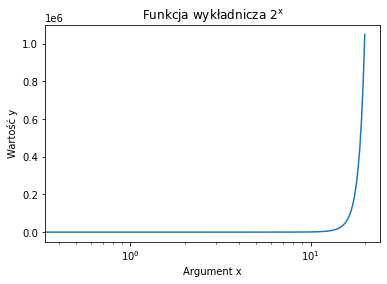

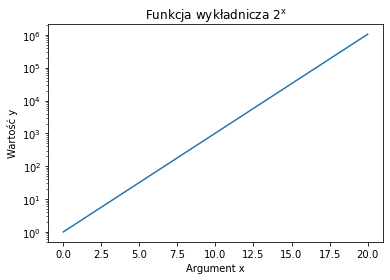

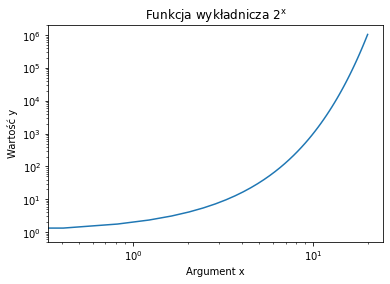

In [6]:
arg = np.linspace(0, 20, 50)
val = 2**arg # specjalnie dobrano funkcję wykładniczą, aby jej reprezentacje były ciekawe
print(main.log_plot(arg,val,'Argument x', 'Wartość y', 'Funkcja wykładnicza $\mathregular{2^x}$', 'x'))
# nastąpiło wypłaszczenie wartości początkowych, gdyż funkcja wykładnicza rośnie coraz szybciej dla coraz większych argumentów
# a argumenty zostały poustawiane w sposób nieliniowy, stąd kumulacja wzrostu na końcu przedziału
print(main.log_plot(arg,val,'Argument x', 'Wartość y', 'Funkcja wykładnicza $\mathregular{2^x}$', 'y'))
# szczególnie w tym przypadku (semilogy) widać, że kształt funkcji jest liniowy, zgodnie z predykcją
print(main.log_plot(arg,val,'Argument x', 'Wartość y', 'Funkcja wykładnicza $\mathregular{2^x}$', 'xy'))
# w przypadku zlogarytmizowania obu osi kształt znowu zmienił się na wykładniczy

**Zadanie 9.**  
Przy pomocy funkcji *log\_plot* przedstaw różne warianty funkcji z zadania 3.

Figure(432x288)
Figure(432x288)
Figure(432x288)


(200, 0.0001)

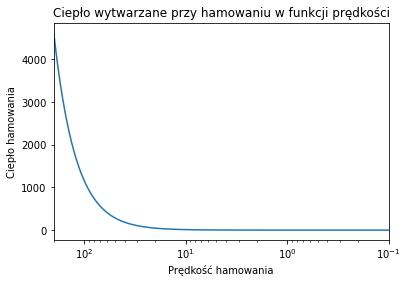

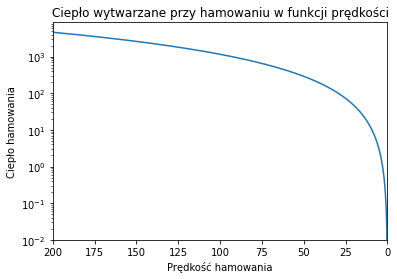

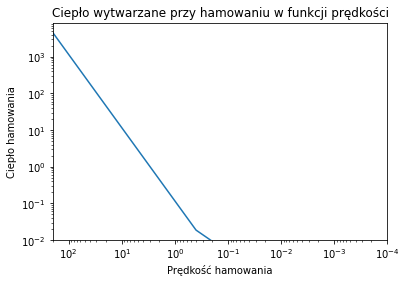

In [24]:
print(main.log_plot(v2, q, 'Prędkość hamowania', 'Ciepło hamowania', 'Ciepło wytwarzane przy hamowaniu w funkcji prędkości', 'x'))
plt.xlim([200,0.1]) # oś OX jest logarytmiczna, zatem nie można zawrzeć zera
print(main.log_plot(v2, q, 'Prędkość hamowania', 'Ciepło hamowania', 'Ciepło wytwarzane przy hamowaniu w funkcji prędkości', 'y'))
plt.xlim([200,0]) # tutaj można zawrzeć zero
print(main.log_plot(v2, q, 'Prędkość hamowania', 'Ciepło hamowania', 'Ciepło wytwarzane przy hamowaniu w funkcji prędkości', 'xy'))
plt.xlim([200,0.0001]) # oś OY jest logarytmiczna, zatem nie można zawrzeć zera
# w ostatnim przypadku dostrzegam, że w zależności od kroku w v2, zamienia się również wykres, zwiększa się zakres osi pionowej
# widać, że funkcja spada do zera, za każdym razem jednak następuje niewielkie załamanie wywołane zbyt małym krokiem (obecnie wynosi 500 elementów)
# największa koncentracja wartości i argumentów znajduje się zrozumiale po lewej stronie wykresu, dlatego ostatnie wartości
# po prawej cechują się o wiele lepiej uwidocznioną metodą łączenia punktów - aproksymacją liniową. Punkty te dzieli tak naprawdę
# względnie niewielka odległość na osi OX, lecz na osi logarytmicznej jest ona zdecydowanie znamienna. Słowem - obserwowanego
# "skoku" po prawej stronie wykresu nie da się zniwelować, chyba żeby rozpatrywać inną funkcję


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

In [7]:
# Wnioski:
# Biblioteki Pythona służące do tworzenia wykresów, to zbiory potężnych narzędzi, które nie ograniczają się jedynie do 
# plottowania 'zwykłych' funkcji. Ich zastosowanie rozszerza się również o wyrysowywanie krzywych parametrycznych, niebędących
# funkcjami. Przy korzystaniu z funkcjonalności typu subplot należy pamiętać, że wykresy mogą na siebie nachodzić, jeśli 
# programista tego nie przypilnuje. Należy również pamiętać o ograniczeniach funkcji wynikających ściśle z matematyki, jak np. 
# brak możliwości zawarcia wartości 0 na osi logarytmicznej. Ćwiczenie to pozwoliło na uzyskanie dość holistycznego spojrzenia 
# na zagadnienie prezentacji danych, stawiając ciekawe wyzwania, których rozwiązanie nie jest określone w jeden sposób, co 
# pozwoliło na poznanie wielu możliwości podejścia do problemu, co dodatkowo zwiększyło znajomość i obycie z wybranymi bibliotekami.